In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("apps.csv")
df

,Unnamed: 0,app_name,rating,app_id,images,rated 1,rated 2,rated 3,rated 4,rated 5,For_notes,For_mock_test,For_pyq
0,0,IIT JEE Mains & Advanced Prep,4.5,com.edurev.iit,https://play-lh.googleusercontent.com/dO8otBHI...,8,1,5,12,72,256,446,8
1,1,"IIT JEE /AIEEE Notes, PYQ, MCQ",4.0,com.jeeprep.examnotes,https://play-lh.googleusercontent.com/y35qeNkn...,7,2,6,17,65,1,5,0
2,2,ThinkMerit - JEE Main|Advanced,4.5,com.thinkmerit.app,0,9,0,5,5,77,2,5,0
3,3,JEE Mains PYQ Questions,4.5,com.examgoal.jeemainpreparation.app,https://play-lh.googleusercontent.com/RxY1Lq8w...,5,0,3,8,81,0,1,0
4,4,Physics Notes offline: Shorts,4.6,com.andromedaastronomers.physicsshorts,https://play-lh.googleusercontent.com/uTtC_Ljx...,8,1,4,8,74,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,69,Maths - IIT JEE Crash Course,4.4,com.maths.jeecrashcourse,https://play-lh.googleusercontent.com/iJzZ3xrz...,8,1,5,13,68,1,18,0
70,70,Crash Course Builder,0.0,com.WombatBrawler.CrashCourse,0,0,0,0,0,0,0,1,0
71,71,Khan Academy,4.3,org.khanacademy.android,https://play-lh.googleusercontent.com/TpK0AcjP...,6,1,2,6,82,0,2,0
72,72,"AcadBoost - JEE, NEET, College",3.7,com.acadboost.courses,https://play-lh.googleusercontent.com/dqeGQJFk...,19,1,1,4,73,1,2,0


In [10]:
df.isnull().sum()

Unnamed: 0       0
app_name         0
rating           0
app_id           0
images           0
rated 1          0
rated 2          0
rated 3          0
rated 4          0
rated 5          0
For_notes        0
For_mock_test    0
For_pyq          0
dtype: int64

In [11]:
df.corr

<bound method DataFrame.corr of     Unnamed: 0                        app_name  rating  \
0            0   IIT JEE Mains & Advanced Prep     4.5   
1            1  IIT JEE /AIEEE Notes, PYQ, MCQ     4.0   
2            2  ThinkMerit - JEE Main|Advanced     4.5   
3            3         JEE Mains PYQ Questions     4.5   
4            4   Physics Notes offline: Shorts     4.6   
..         ...                             ...     ...   
69          69    Maths - IIT JEE Crash Course     4.4   
70          70            Crash Course Builder     0.0   
71          71                    Khan Academy     4.3   
72          72  AcadBoost - JEE, NEET, College     3.7   
73          73    Course Hero: Homework Helper     4.3   

                                    app_id  \
0                           com.edurev.iit   
1                    com.jeeprep.examnotes   
2                       com.thinkmerit.app   
3      com.examgoal.jeemainpreparation.app   
4   com.andromedaastronomers.physicsshort

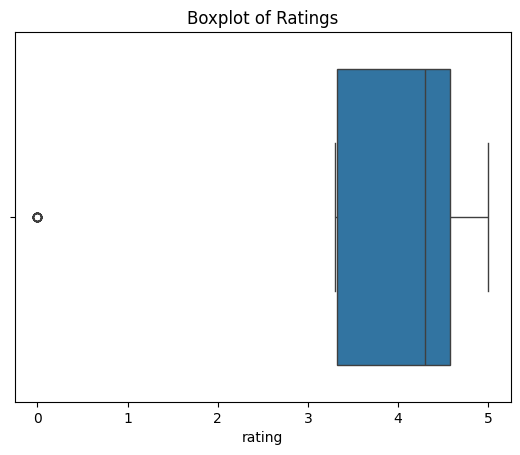

In [12]:
#BOXPLOT
sns.boxplot(x='rating', data=df)
plt.title('Boxplot of Ratings')
plt.show()

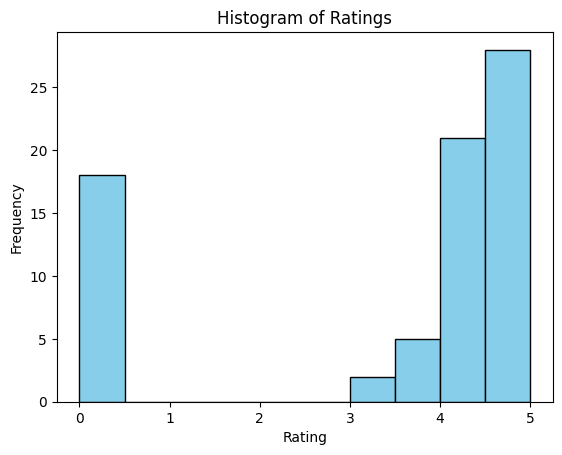

In [13]:
#HISTOGRAM
plt.hist(df['rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()


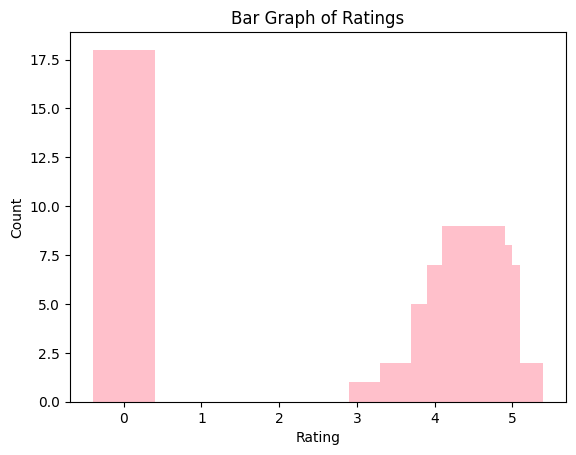

In [14]:
#BARGRAPH
rating_counts = df['rating'].value_counts()
plt.bar(rating_counts.index, rating_counts.values, color='pink')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Bar Graph of Ratings')
plt.show()


In [ ]:
#MULTIVARIENT ANALYSIS

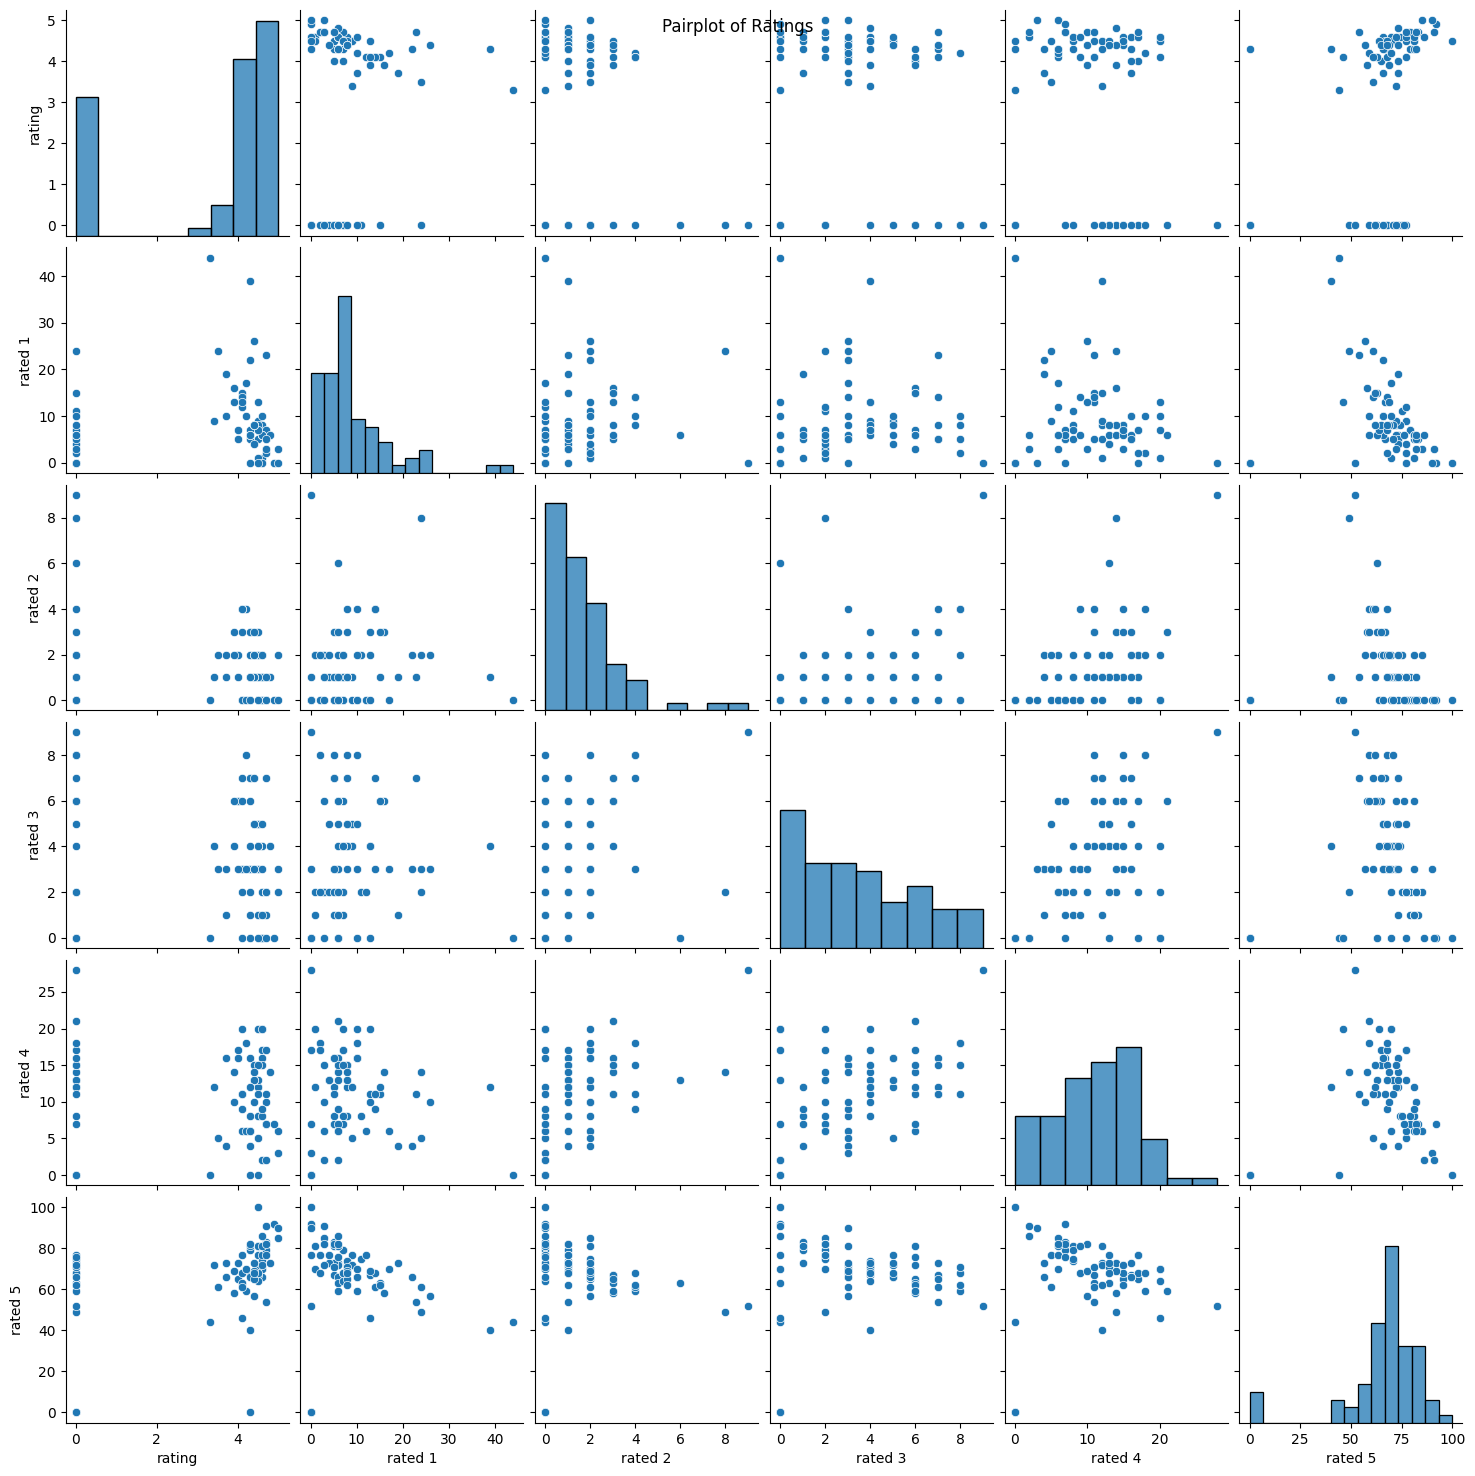

In [23]:
#PAIRPLOT
import seaborn as sns
sns.pairplot(df[['rating', 'rated 1', 'rated 2', 'rated 3', 'rated 4', 'rated 5']])
plt.suptitle('Pairplot of Ratings')
plt.show()

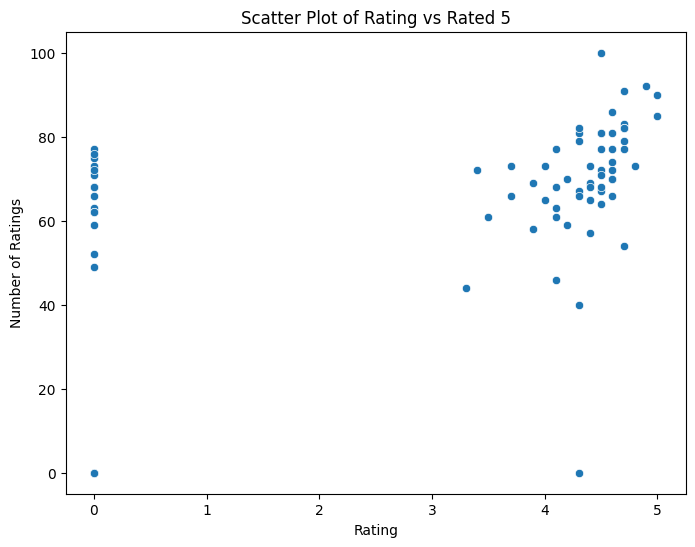

In [24]:
#SCATTERPLOT
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rating', y='rated 5', data=df)
plt.title('Scatter Plot of Rating vs Rated 5')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

In [25]:
# Group by 'rating' and calculate the mean 'rated 5' for each group
rating_grouped = df.groupby('rating')['rated 4'].mean()

print(rating_grouped)

rating
0.0    12.222222
3.3     0.000000
3.4    12.000000
3.5     5.000000
3.7    10.000000
3.9    12.000000
4.0    16.500000
4.1    11.400000
4.2    12.000000
4.3     7.428571
4.4    13.000000
4.5    10.666667
4.6    13.375000
4.7     8.714286
4.8    14.000000
4.9     7.000000
5.0     4.500000
Name: rated 4, dtype: float64


In [27]:
from scipy import stats


# Select data for the two groups you want to compare
rating_4_5 = df[df['rating'] == 4.5]['rated 5']
rating_4_0 = df[df['rating'] == 4.0]['rated 5']

# Perform a t-test
t_statistic, p_value = stats.ttest_ind(rating_4_5, rating_4_0)

print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: 0.8139382036355742
P-value: 0.43668495653617123


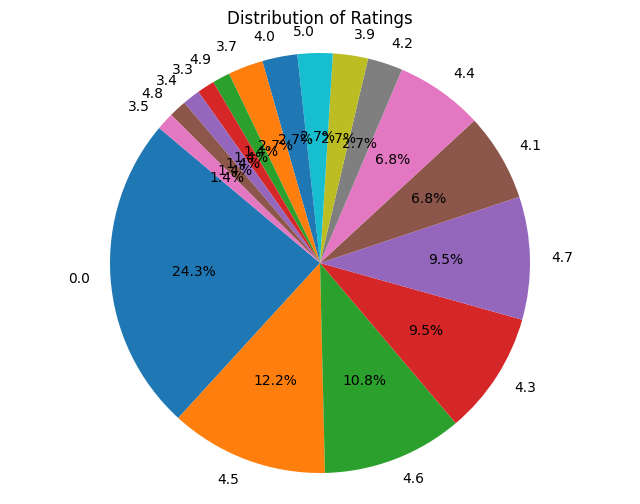

In [28]:
#pie chart
plt.figure(figsize=(8, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
